<h1>Sisällysluettelo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Miten-satumetsän-puut--varjostavat-toisiaan" data-toc-modified-id="Miten-satumetsän-puut--varjostavat-toisiaan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Miten satumetsän puut  varjostavat toisiaan</a></span><ul class="toc-item"><li><span><a href="#Segmentin-pinta-ala" data-toc-modified-id="Segmentin-pinta-ala-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Segmentin pinta-ala</a></span></li><li><span><a href="#Ohjelmakoodin-automaattinen-generointi" data-toc-modified-id="Ohjelmakoodin-automaattinen-generointi-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ohjelmakoodin automaattinen generointi</a></span></li><li><span><a href="#jupyter-notebook-ja-python--versiot-tästä-dokumentista" data-toc-modified-id="jupyter-notebook-ja-python--versiot-tästä-dokumentista-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>jupyter notebook ja python -versiot tästä dokumentista</a></span></li></ul></li></ul></div>

# Miten satumetsän puut  varjostavat toisiaan

Satumetsän puiden lehvästö on suurinpiirtein pallon muotoinen. Koska kraateriimme tulee valoa vain ylhäältä, arvelimme puiden kasvun olevan verrannollista puusta ylöspäin näkyvän kiekon pinta-alaan. Vettä ja ravinteita imevän juuriston voi ajatella maan alla kasvavaksi lehvästön peilikuvaksi, joten se tulee otettua samalla huomioon. (Ei tämä tietenkään pidä yhtä todellisuuden kanssa, mutta onpahan jotenkin mukavan oloinen oletus.)

Lähekkäin kasvavat puut varjostavat toisiaan, joten meidän piti laskea muodostuvan varjon pinta-ala.


Piirsimme kuvan kahdesta limittäin kasvavasta puusta: 

![Limittyvät kiekot: Tapaus A](Segmentit.jpg "Limittyvät kiekot: Tapaus A")

Peikkokoulun matematiikan opettaja tiesi kertoa, että kiekon pinta-ala A on $A = \pi \cdot r^2$, mutta hän sanoi, että on hirveän iso työ laskea pinta-ala "ihmesoikiolle", jonka kaksi osin päällekkäin olevaa kiekkoa muodostavat. "Sehän on se katve-alue, jonka pinta-alan haluatte tietää."

Sitten opettava oivalsi, että "ihmesoikio" on oikeastaan kaksi segmenttiä, yksi kummastakin kiekosta. "Segmentin pinta-alan laskemiseen löytyy valmis kaava."

Segmentin pinta-alan kaava tutkiessamme tajusimme, että kiekot voivat olla päällekkäin paljon enemmän kuin ensimmäisessä kuvassamme:

![Limittyvät kiekot: Tapaus B](SegmentitIsot.jpg "Limittyvät kiekot: Tapaus B")

"Kaiken muun lisäksi teidän pitää vielä miettiä, mitä milloinkin lasketaan. Sikamaisen hirveä työ", opettaja kannusti peikkomaiseen tyyliinsä.

Katsoimme kuvaa pitkää. Taitaa olla niin, että kun kuvassa c1:n ja r2:n välinen kulma $ \alpha > 90^o$, eli kun $ r_2² > d² + r_1² $, katve-alue on pienemmän kiekon sisään muodostuvan segmentin suuruinen.


Aluksi ajattelimme, että siltä osin, kuin kaksi puuta kasvaa limittäin ne saavat kumpikin puolet valosta. 
Sitten älysimme, että pieni puu ei varjosta isompaa niin pahasti kuin iso pienempää, vaikka imeekin siltä vettä ja ravinteita. 
Ehkä katveen aiheuttama haitta on verrannollinen puiden kokojen suhteeseen

$$ haitta_1 = \frac{r_2}{r_1 + r_2} \cdot A_{varjo}$$ 

Jos puiden koot ovat $r_1 = 2$ ja $r_2 = 1$ niin isomman puun auringon valoa saava pinta-ala pienee 1/3:lla varjon pinta-alasta ja pienemmän 2/3.   

## Segmentin pinta-ala

Olimme jo oppineet, että "sikamaisen hirveät työt" kannattaa teettää tietokoneella. Tällaiseenkin löytyi kopioitavaksi sopiva malli. Sen ymmärtämisessä oli hirveän iso työ, mutta tästä lähtien voimme tehdä kaikki yhtälöiden pyöritykset tietokoneella.

In [12]:
from IPython.display import display
import numpy
import math
import sympy as sp  # Sympy on symbolisen laskentaan tarkoitettu python-kirjasto
import textwrap

sp.init_printing()

In [13]:
# Kerrotaan ohjelmalle, että allaolevat pitää ymmärtää symbolisiksi muuttujiksi eikä numeroiksi. 
r1, r2, d, alpha, cosa = sp.symbols("r_1, r_2, d, alpha, cosa")

r1:n ja c1:n välinen kulma voidaan laskea [kosinilauseen](https://fi.wikipedia.org/wiki/Kosinilause) avulla. Helppo tuo olisi varmaan ollut itsekin johtaa, mutta kopioimme webistä, kun hakukone sitä tyrkytti. Pääsimme nopeammin ohjelmoinnin alkuun.

$ r_2^2 = r_1^2 + d^2 - 2 \cdot r_1 \cdot d \cdot cos(\alpha)$

Krjoitimme yhtälön Sympyä miellyttävään muotoon ja ratkaisimme $\alpha$:n.

Mistäkö tiesimme, mikä Sympyä miellyttää? Emme tienneetkään, vaan jouduimme lukemaan manuaaleja ja kokeilemaan esimerkkejä. 

- Ensimmäiseksi piti oppia ymmärtämään, mitä on symbolinen laskenta ja millaisia temppuja sillä voi noin yleensä tehdä.

- Sitten piti opetella selvittämään, miten tietyt temput tehdään Sympyllä. Esimerkeistä opimme paljon, mutta niissä ei ollut kaikkea tarvitsemaamme. Piti opetella, miten hakukoneilemalla saa hyödyllisiä vastauksia.

- Kun tuloksia alkoi tulla, piti perehtyä lisää matematiikkaan. Tuloksissa oli usein jotain yllättävää.

- Sympy-notaatio ei ole puhdasta matematiikkaa vaan myös pythonia, koska Sympy on tarkoitettu käytettäväksi ohjelmallisesti. Sympy antamat ratkaisut ovat usein Pythonin listoja ja python-dictionaryja.

Tämä dokumentti näyttää matematiikan työkirjalta, koska olen tehnyt tämän jupyter-notebook sovelluksella, jossa voi tällä tavalla yhdistää matemaattista tekstiä ja python-koodia ja näyttää tulokset matemaattista merkintätapaa käyttäen.

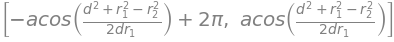

In [14]:
eq1 = sp.Eq(r2**2, r1**2 + d**2 - 2*r1*d*sp.cos(alpha))
sol1 = sp.solve(eq1, alpha)
display(sol1)
alpha = sol1[1]

Saimme kaksi ratkaisua? Jälkimmäinen näytti järkevältä, joten käytämme sitä jatkossa. Ensimmäinen ratkaisu — sol1[0] — on oikeastaan sama kulma miinusmerkkisenä. Yksikköympyrän piirtämällä ymmärrät ehkä parhaiten, miksi tuloksia on kaksi. Tai oikeastaan äärettömän monta — kaksi joka kierroksella yksikköympyrän ympäri eli $2\pi$ välein.

Kokeilimme varmuuden vuoksi, millaisia tuloksia saamme muutamalle erikokoiselle ympyrälle. 

In [15]:
print((sol1[0]-2*math.pi).subs({r1: 2, r2: 3, d: 4}).evalf()*180/math.pi)
print((sol1[0]-2*math.pi).subs({r1: 2, r2: 3, d: 2}).evalf()*180/math.pi)
print((sol1[0]-2*math.pi).subs({r1: 2, r2: 3, d: 1}).evalf()*180/math.pi)
print(sol1[1].subs({r1: 2, r2: 3, d: 4}).evalf()*180/math.pi)
print(sol1[1].subs({r1: 2, r2: 3, d: 2}).evalf()*180/math.pi)
print(sol1[1].subs({r1: 2, r2: 3, d: 1}).evalf()*180/math.pi)
print(sol1[1].subs({r1: 2, r2: 2, d: 2}).evalf()*180/math.pi)

-46.5674634422102
-97.1807557814583
-180.000000000000
46.5674634422102
97.1807557814583
180.000000000000
60.0000000000000


[Segmentin pinta-alan laskusäännön](https://www.mathsisfun.com/geometry/circle-sector-segment.html) mukaan meidän on laskettava ympyrän keskuskolmion ala. Sitä varten tarvitsemme korkeuden h, mikä taas on kätevä laskea $sin(\alpha)$:n ja $r_1$:n avulla. Trigonometrian kaavakokoelmasta löysimme kaavan $ sin²(\alpha) + cos²(\alpha) = 1$ 

Selvitetään ensin, mikä on $cos(\alpha)$. Kirjoitetaan kosinilause uudestaan, mutta kirjoitetaan $cos(\alpha)$:n paikalle cosa ja ratkaistaan se.

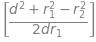

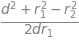

In [16]:
eq2 = sp.Eq(r2**2, r1**2 + d**2 - 2*r1*d*cosa)
sol2 = sp.solve(eq2,cosa)
display(sol2)
sol2[0]

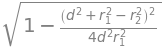

In [17]:
cosa = sol2[0]
sina = sp.sqrt(1 - cosa**2)
display(sina)

hauska harjoitus, mutta yhtä hyvin voisimme käyttää $sin(\alpha)$:a kun kerran $\alpha$:n osaamme laskea.

Lopuksi sijoitetaan segmentin laskusääntöön. Kolmion korkeus on kummassakin tapauksessa $r_1\cdot sin(\alpha)$ koska 
$sin(\alpha) = sin(\pi - \alpha)$ kuten alla näkyy.

In [18]:
x = sp.symbols("x")
sp.solve(sp.Eq(sp.sin(x), sp.sin(sp.pi - x)))

Keskuskulma on $2\alpha$ ja keskuskolmio on kaksi kertaa tarkastelemamme kolmion suuruinen. (punainen peilikuva pitää ottaa huomioon)

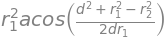

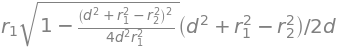

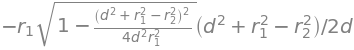

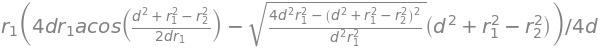

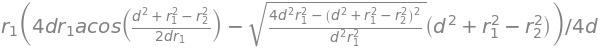

In [19]:
h1,c1,c2 = sp.symbols("h_1, c_1, c_2")
Asektori = (2*alpha/2)*r1**2
h = r1*sina 
c1 = r1*cosa # tapaus A
c2 = r1*sp.cos(sp.pi - alpha) # tapaus B
Akeskuskolmioa = 2*(h*c1/2)
Akeskuskolmiob = 2*(h*c2/2)
Asegmenttia = sp.simplify(Asektori - Akeskuskolmioa)
Asegmenttib = sp.simplify(Asektori + Akeskuskolmiob)
display(Asektori, Akeskuskolmioa, Akeskuskolmiob, Asegmenttia, Asegmenttib)

Kokeillaan, antaako lauseke ensinkään järkevän näköisiä tuloksia.

In [20]:
print((math.pi*x**2).subs({x: 2}).evalf())
print(math.sqrt(2**2 + 3**2))
print("--")
print(Asegmenttia.subs({r1: 2, r2: 1.1, d: 3}).evalf())
print(Asegmenttia.subs({r1: 29, r2: 31, d: 60}).evalf())
print(Asegmenttia.subs({r1: 2, d: 3, r2: math.sqrt(2**2 + 3**2)}).evalf())
print(Asegmenttib.subs({r1: 2, d: 3, r2: math.sqrt(2**2 + 3**2)}).evalf())
print(Asegmenttib.subs({r1: 2, r2: 4, d: 3}).evalf())
print(Asegmenttib.subs({r1: 2, r2: 5, d: 3}).evalf())

12.5663706143592
3.605551275463989
--
0.0174151606395022
0
6.28318530717958
6.28318530717958
8.26215216429975
12.5663706143592


## Ohjelmakoodin automaattinen generointi

Segmentin pinta-alan lausekkeen voi printata muodossa, joka sellaisenaan kelpaa python-koodin sekaan copy-pastettavaksi


In [21]:
print(Asegmenttia)

r_1*(4*d*r_1*acos((d**2 + r_1**2 - r_2**2)/(2*d*r_1)) - sqrt((4*d**2*r_1**2 - (d**2 + r_1**2 - r_2**2)**2)/(d**2*r_1**2))*(d**2 + r_1**2 - r_2**2))/(4*d)



Koska teimme monta ajatusvirhettä, koodin pätkien kopiointi aina uudelleen alkoi harmittaa. Päätimme printata suoraan funktion, jolla lasketaan puiden katveen pinta-ala ja opettelimme vielä kirjoittamaan varjon laskemisen erilliseen tiedostoon omaksi python-modulikseen. Aina kun käynnistämme ohjelman, se lataa modulimme uusimman version. Aina kun huomasimme ylläesitetyssä pinta-alan laskennassa jonkin virheen, korjasimme sen ja annoimme `cell -> run all`-komennon [tässä jupyter notebookissa](SegmentinPintaAla.ipynb) ja käynnistimme simulaattorimme uudelleen.

(Virheitä saattaa olla vieläkin. Simuloinnin lopputuloksessa ei välttämättä helposti huomaa pientä eroa katveiden vaikutuksessa puiden kasvuun, kunhan vaikutus on oikean suuntaista.)

Jos haluat kokeilla symbolista laskentaa, mutta et jaksa installoida jupyter-ympäristöä, lataa 
[tämä python-kielinen versio](SegmentinPintaAla.py)

In [22]:
with open('katveet.py', 'w') as fil:
    fil.write("# -*- coding: utf-8 -*-\n\n")
    fil.write("# from xxxx import yy, zz aiheuttaa helposti ongelmia \n")
    fil.write("# mutta tässä se helpottaa \n")    
    fil.write("from math import acos, sqrt, pi \n\n")
    fil.write(" \n\n")

    fil.write("def debug(r_1, r_2, d):\n")
    fil.write("    print(['debug ',r_1, r_2, d])\n")
    fil.write("    c1 = " + str(c1) + "\n")
    fil.write("    print(['c1 ', c1])\n\n")
    fil.write("    h = " + str(h) + "\n")
    fil.write("    print(['h ', h])\n\n")
    fil.write("    Alpha = " + str(alpha) + "\n")
    fil.write("    print(['alpha ', Alpha])\n\n")
    fil.write("    Asektori = " + str(Asektori) + "\n")
    fil.write("    print(['asektori ', Asektori])\n\n")
    fil.write("    Keskuskolmio = " + str(Akeskuskolmioa) + "\n")
    fil.write("    print(['keskuskolmio ', Keskuskolmio])\n\n")

    fil.write("# Kiekot vain vähän päällekkäin\n")
    fil.write("def seg1A(r_1, r_2, d):\n")
#    fil.write("    debug(r_1, r_2, d)\n")
    fil.write("    return " + textwrap.fill(str(Asegmenttia), 64, subsequent_indent ='        ') + "\n\n")
    fil.write("# Kiekot reilusti päällekkäin\n")
    fil.write("def seg2A(r_1, r_2, d):\n")
    fil.write("    return " +  textwrap.fill(str(Asegmenttib), 64, subsequent_indent = '        ') + "\n\n")

    fil.write("# Vähän tai paljon päällekkäin:\n")

    fil.write("def varjo(r1, r2, d):\n")
    fil.write("# Jos kiekko 2 nielaisee kokonaan kiekon 1\n")
    fil.write("    if r2 >= d + r1:\n")
#    fil.write("        print('varjo1')\n")
    fil.write("        return pi*r1**2\n")
    fil.write("# Jos kiekko 1 nielaisee kokonaan kiekon 2\n")
    fil.write("    elif r1 >= d + r2:\n")
#    fil.write("        print('varjo2')\n")
    fil.write("        return pi*r2**2\n")
    fil.write("# Kiekot reilusti päällekkäin\n")
    fil.write("    elif r1**2 > r2**2 + d**2:\n")
#    fil.write("        print('varjo3')\n")
    fil.write("        return seg2A(r2,r1,d) + seg1A(r1,r2,d)\n")
    fil.write("    elif r2**2 > r1**2 + d**2:\n")
#    fil.write("        print('varjo4')\n")
    fil.write("        return seg2A(r1, r2, d) + seg1A(r2,r1,d)\n")
    fil.write("# Kiekot vain vähän päällekkäin\n")
    fil.write("    else:\n")
#    fil.write("        print('varjo5')\n")
    fil.write("        return seg1A(r1,r2,d) + seg1A(r2,r1,d)\n")


## jupyter notebook ja python -versiot tästä dokumentista

[jupyter notebookissa](SegmentinPintaAla.ipynb)

[python-kielinen versio](SegmentinPintaAla.py)